# Task 2

## Import Libraries

In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
import logging
import pandas as pd
from tqdm import tqdm

from environment_gym import TrafficEnvironment
from task2_environment import CustomTrafficEnvironment
from task2_agents import RuleBasedAgent, TemporalDifference

c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Rule-Based Agent

### Evaluation

In [2]:
def evaluate_agent(agent, env, num_episodes=10, starting_lane = 1):
    all_episode_rewards = []
    all_timesteps = []
    truncated_count = 0

    for episode in tqdm(range(num_episodes)):
        episode_rewards = []
        
        options = {
            'starting_lane': starting_lane
        }
        state, _ = env.reset(options=options)
        terminated = False
        truncated = False
        cumulative_reward = 0
        timestep = 0
        action_mapping = {0: 'left', 1: 'stay', 2: 'right'}

        while not terminated and not truncated:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            cumulative_reward += reward
            state = next_state
            timestep += 1
            
            # Store rewards at each timestep for this episode
            episode_rewards.append(cumulative_reward)

            if truncated:
                truncated_count += 1
                break

        # Append results for each episode
        all_episode_rewards.append(cumulative_reward)
        all_timesteps.append(timestep)

    print(f"Truncated episodes: {truncated_count}")
    
    return all_episode_rewards, all_timesteps

def plot_eval_metrics(all_episode_rewards, all_timesteps, window_size=10):
    """
    Plot cumulative rewards and timesteps to termination with a rolling mean.

    Args:
    - all_episode_rewards (list of lists): Cumulative rewards for each episode.
    - all_timesteps (list): Number of timesteps to termination for each episode.
    - window_size (int): Window size for rolling mean.
    """
    # Compute rolling mean for cumulative rewards across episodes
    rolling_rewards = pd.DataFrame(all_episode_rewards).mean(axis=0).rolling(window_size).mean()
    # Compute rolling mean for timesteps to termination
    rolling_timesteps = pd.Series(all_timesteps).rolling(window_size).mean()

    # Plot the cumulative rewards with rolling mean
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rolling_rewards, label='Cumulative Reward (Rolling Mean)')
    plt.xlabel('Timesteps')
    plt.ylabel('Cumulative Reward')
    plt.title(f'Cumulative Rewards Over Episodes (Rolling Mean - Window Size: {window_size})')
    plt.legend()

    # Plot the timesteps to termination with rolling mean
    plt.subplot(1, 2, 2)
    plt.plot(rolling_timesteps, label='Timesteps to Termination (Rolling Mean)')
    plt.xlabel('Episode')
    plt.ylabel('Timesteps')
    plt.title(f'Timesteps to Termination (Rolling Mean - Window Size: {window_size})')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Fastest Adjacent Lane

In [ ]:
env.enable_logging()

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False)
# Evaluate each strategy
strategy = 'fastest_adjacent'
rewards_dict = {}
timesteps_dict = {}

agent = RuleBasedAgent(strategy=strategy)
# episode_rewards, checkpoint_rewards, timesteps_to_termination = evaluate_agent(agent, env)
all_episode_rewards, all_timesteps = evaluate_agent(agent, env, num_episodes=500)
rewards_dict['Fastest Adjacent Lane Agent'] = all_episode_rewards
timesteps_dict['Fastest Adjacent Lane Agent'] = all_timesteps
# env.logger.info("\n"*5)

100%|██████████| 500/500 [00:27<00:00, 18.51it/s]

Truncated episodes: 408


In [7]:
print(f'Average cumulative rewards for Fastest Adjacent Lane strategy: {round(np.mean(rewards_dict['Fastest Adjacent Lane Agent']))}')
print(f'Average timesteps to termination for Fastest Adjacent Lane strategy: {round(np.mean(timesteps_dict["Fastest Adjacent Lane Agent"]))}')

Average cumulative rewards for Fastest Adjacent Lane strategy: -78
Average timesteps to termination for Fastest Adjacent Lane strategy: 122


### Same Lane

In [10]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False)

for i in range(5):
    env.logger.info(f"Evaluating Agent {i+1}")
    agent = RuleBasedAgent(strategy='stay')
    all_episode_rewards, all_timesteps = evaluate_agent(agent, env, num_episodes=500, starting_lane=i+1)
    rewards_dict[f'Same Lane Agent {i+1}'] = all_episode_rewards
    timesteps_dict[f'Same Lane Agent {i+1}'] = all_timesteps

100%|██████████| 500/500 [00:15<00:00, 32.21it/s]


Truncated episodes: 421


100%|██████████| 500/500 [00:16<00:00, 31.07it/s]


Truncated episodes: 416


100%|██████████| 500/500 [00:16<00:00, 30.50it/s]


Truncated episodes: 420


100%|██████████| 500/500 [00:16<00:00, 30.17it/s]


Truncated episodes: 441


100%|██████████| 500/500 [00:16<00:00, 30.29it/s]

Truncated episodes: 427


In [13]:
for i in range(5):
    print(f'Average cumulative rewards for Same Lane Agent {i+1}: {round(np.mean(rewards_dict[f"Same Lane Agent {i+1}"]))}')
    print(f'Average timesteps to termination for Same Lane Agent {i+1}: {round(np.mean(timesteps_dict[f"Same Lane Agent {i+1}"]))}')
    print('\n')

Average cumulative rewards for Same Lane Agent 1: -383
Average timesteps to termination for Same Lane Agent 1: 167


Average cumulative rewards for Same Lane Agent 2: -382
Average timesteps to termination for Same Lane Agent 2: 175


Average cumulative rewards for Same Lane Agent 3: -381
Average timesteps to termination for Same Lane Agent 3: 175


Average cumulative rewards for Same Lane Agent 4: -508
Average timesteps to termination for Same Lane Agent 4: 179


Average cumulative rewards for Same Lane Agent 5: -454
Average timesteps to termination for Same Lane Agent 5: 176




## Value-based Agent

### TD-Lambda

100%|██████████| 1000/1000 [00:24<00:00, 40.99it/s]


Truncated episodes: 911
Sum of total rewards = -625054.2999999998
Average total reward per episode = -625.0542999999999
Average steps per episode = 122.186


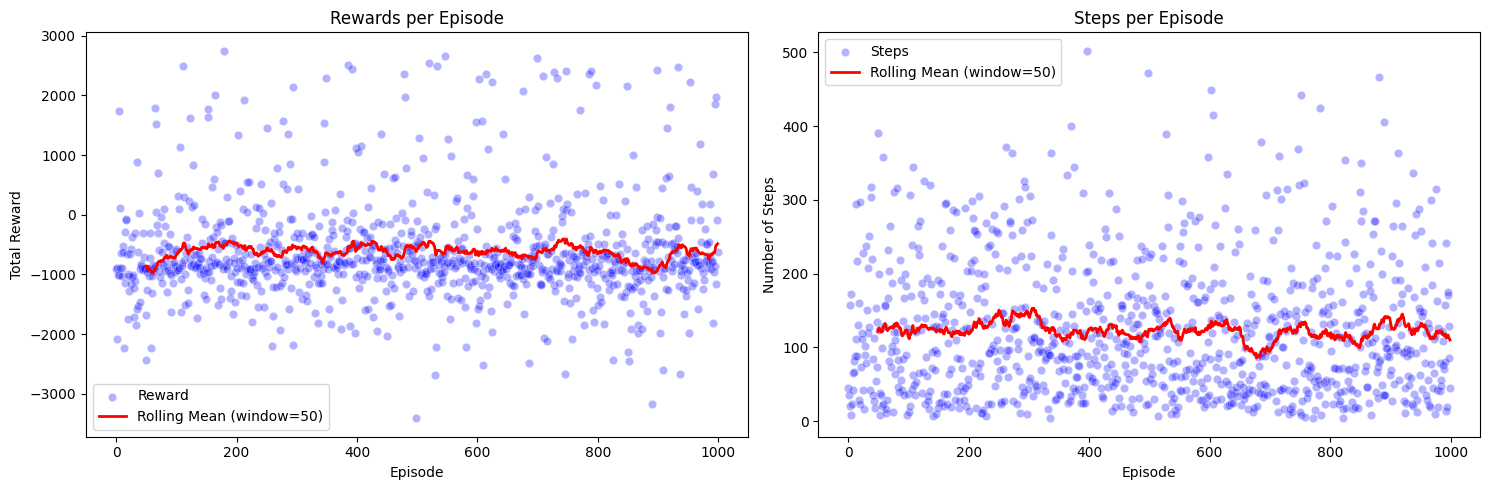

In [14]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False)

td_lambda = TemporalDifference(env, oiv = 0.1, alpha=0.01, epsilon=1.0, lambd=0, gamma=0.95, epsilon_decay=0.999, epsilon_min=0.1)
total_reward_list, total_steps_list = td_lambda.train(num_episodes = 1000, on_policy = False, save_model = False)
total_rew = sum(total_reward_list)
avg_rew = np.mean(total_reward_list)
avg_steps = np.mean(total_steps_list)

print(f'Sum of total rewards = {total_rew}')
print(f'Average total reward per episode = {avg_rew}')
print(f'Average steps per episode = {avg_steps}')

# plot training metrics
td_lambda.plot_training_metrics(window_size=50)
plt.show()

In [15]:
print(len(td_lambda.Q))

5580


 State Space Size = 10 (Distance) x 5 (Lanes) x 5 x 5 x 5 (Clearance Rates) x 3 (Actions) = 18,750

In [16]:
data = {
        "State": [],
        "Left": [],
        "Stay": [],
        "Right": []
    }
    
for state, q_values in td_lambda.Q.items():
    data["State"].append(state)
    for i in range(len(q_values)):
        data['Left' if i==0 else 'Stay' if i==1 else 'Right'].append(q_values[i])

# Convert the dictionary to a DataFrame
q_df = pd.DataFrame(data)

In [17]:
q_df.head()

,State,Left,Stay,Right
0,"(9, 2, 4, 3, 4, 0)",1.053884,20.335863,1.521346
1,"(10, 1, 3, 0, 4, 0)",0.167757,6.086663,0.599259
2,"(9, 1, 3, 0, 4, 0)",0.710276,1.640578,11.473677
3,"(9, 2, 4, 2, 4, 0)",0.663458,10.469894,0.404708
4,"(9, 3, 4, 4, 4, 0)",0.294044,0.620708,2.569170


### Evaluation

In [19]:
td_lambda.Env.enable_logging()

In [20]:
# Evaluate the agent in inference mode
all_rewards, all_steps, checkpoint_rewards = td_lambda.evaluate(num_episodes=1, checkpoint_interval=50)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {np.mean(all_rewards)}")
print(f"Average timesteps to termination for TD-Lambda Agent: {np.mean(all_steps)}")

100%|██████████| 1/1 [00:00<00:00, 24.70it/s]

Average cumulative rewards for TD-Lambda Agent: -983.5
Average timesteps to termination for TD-Lambda Agent: 94.0


In [9]:
td_lambda.Env.disable_logging()

In [19]:
print(f"Average cumulative rewards for TD-Lambda Agent: {np.mean(all_rewards)}")
print(f"Average timesteps to termination for TD-Lambda Agent: {np.mean(all_steps)}")

Average cumulative rewards for TD-Lambda Agent: -481.6
Average timesteps to termination for TD-Lambda Agent: 422.0


### Hyperparameter Tuning

In [ ]:
hyperparameter_space = {
    'alpha': [1e-5, 1e-2],           # Learning rate range (log scale)
    'gamma': [0.8, 0.99],            # Discount factor range
    'epsilon_decay': [0.9, 0.9999],   # Epsilon decay range
    'epsilon_min': [0.01, 0.1],      # Minimum epsilon range
    'lambd': [0, 1]             # Lambda range for eligibility traces
}
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False)
td_lambda = TemporalDifference(env)
# Run hyperparameter tuning
best_agent, best_params = td_lambda.hyperparameter_tuning(hyperparameter_space, episodes=1000, n_trials=50)

## Policy-based Agent